<a href="https://colab.research.google.com/github/Yurih1/DataScience/blob/master/Regressao_Linearipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (Regressão Linear)

In [ ]:
# Vamos estudar regressão linear partindo de notas de alunos

# Estudante	Horas_de_Estudo	Nota (0-100)
#     1	        1	          53
#     2	        5	          74
#     3	        7	          59
#     4	        8	          43
#     5	        10	        56
#     6	        11	        84
#     7	        14	        96
#     8	        15	        69
#     9	        15	        84
#    10	        19	        83

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
horas_estudo = np.array([1,5,7,8,10,11,14,15,15,19]).reshape((-1, 1))
horas_estudo

array([[ 1],
       [ 5],
       [ 7],
       [ 8],
       [10],
       [11],
       [14],
       [15],
       [15],
       [19]])

In [ ]:
notas = np.array([53,74,59,43,56,84,96,69,84,83]).reshape((-1, 1))
notas

array([[53],
       [74],
       [59],
       [43],
       [56],
       [84],
       [96],
       [69],
       [84],
       [83]])

In [ ]:
# Criando um modelo de regressão 
modelo = LinearRegression()

In [ ]:
# Agora vamos treinas nosso modelo - fit()
modelo.fit(horas_estudo, notas)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Avaliando os resultados 
# Intercep: mostra o ponto onde a regressão "estimada" cruza o eixo y, quando x=0
# Slop: Representa quanto o valor vai aumentar ou diminuir a resposta da predição

In [ ]:
# medir os scores: o quanto o modelo ajustou 
modelo.score(horas_estudo, notas)

0.39412152258869326

In [ ]:
# intercept
modelo.intercept_

array([49.47712665])

In [ ]:
# vamos tentar descobrir quantas horas devo estudar para tirar nota
novas_horas = np.array([32]).reshape((-1, 1))

# predict é utilizado para fazer a predição "descoberta"
modelo.predict(novas_horas)

array([[112.32778828]])

In [ ]:
# Algumas estatíticas 


print('Média:', horas_estudo.mean())
print('Menor:', horas_estudo.min())
print('Maior:', horas_estudo.max())

Média: 10.5
Menor: 1
Maior: 19


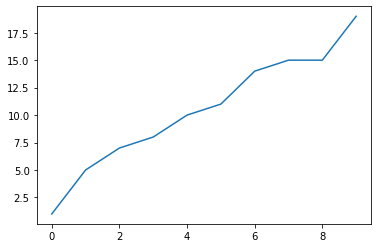

In [ ]:
import matplotlib.pyplot as plt
# comportamento das horas de estudo 
plt.plot(horas_estudo)

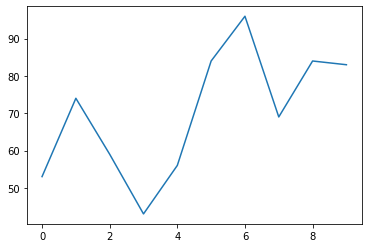

In [ ]:
plt.plot(notas)

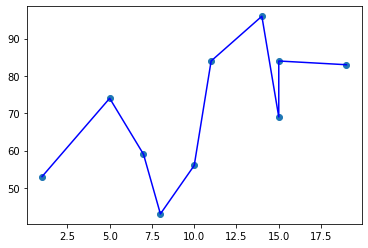

In [ ]:
# visualizando as dispersão 
plt.scatter(horas_estudo, notas)
plt.plot(horas_estudo, notas, color='blue')
# Qual o nome desse fenômeno? R: underfitting

# vamos dar um up

In [ ]:
import pandas as pd


In [ ]:
# Criação do DataFrame
dataframe = pd.DataFrame()
dataframe['x'] = [5.1, 5.5, 5.9, 6.5, 6.8, 7.6, 8.3, 8.5, 9.1, 9.5]  # horas de estudo
dataframe['y'] = [2.0, 2.9, 4.0, 5.9, 6.0, 6.9, 8.0, 9.0, 9.9, 11.0] # pontuaçao alcançada
x_values = dataframe[['x']]
y_values = dataframe[['y']]

In [ ]:
# treinando o modelo 
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# mostrando os valores obtidos
print('Utilizando biblioteca Scikit-Learn')
print('y = ax + b')
print('a = %.2f => a inclinação da linha de tendência.' % model.coef_[0][0])
print('b = %.2f => o ponto onde a linha de tendência atinge o eixo y.' % model.intercept_[0])

Utilizando biblioteca Scikit-Learn
y = ax + b
a = 1.92 => a inclinação da linha de tendência.
b = -7.39 => o ponto onde a linha de tendência atinge o eixo y.


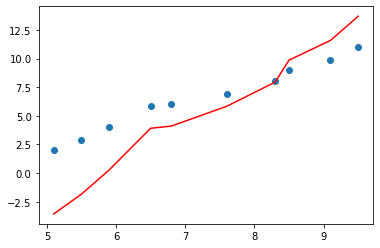

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(dataframe['x'].values, dataframe['y'].values)

# traçando a linha da regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
# plotando um gráfico em cima do outro
plt.plot(dataframe['x'].values, reta(dataframe['y'].values), 'r')
plt.show()

In [ ]:
# predição
model.score(x_values, y_values)

0.9820148319118528

In [ ]:
horas = 8.8
nota = model.predict(np.array([[horas]]))
print('Nota:', model.predict([[horas]]))


Nota: [[9.47225111]]


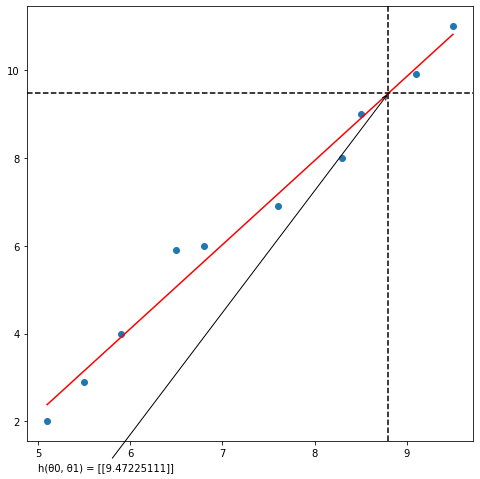

In [ ]:
# gráfico 
plt.figure(1, figsize=(8, 8))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit)

txt ='h(θ0, θ1) = ' + str(nota)
plt.annotate(
    txt, xy=(horas, nota), xytext=(5, 0.9), 
    arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.axvline(x=horas, ymin=0, ymax=nota, ls='--',c='black')
plt.axhline(y=nota, ls='--',c='black')